In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#style 
plt.style.use('ggplot')

In [3]:
#import the text
df = pd.read_csv("features.txt",sep="\t",header=None,names=['doc_id','features'])

In [4]:
df.head()

,doc_id,features
0,0,"alfonsin,allsuite,arnott,bonded,briefed,bulax,..."
1,0,"dependent,cellulosa,allentown,bases,ergenc,err..."
2,0,"cellulosa,emphasizing,edina,celsius,dependent,..."
3,0,"edina,cellulosa,allentown,emphasizing,celsius,..."
4,0,"downed,ecologists,edina,emphasizing,cellulosa,..."


In [5]:
#append all df into the list
count_freq = []

for index,row in df.iterrows():
    count_freq.append((row['doc_id'],row['features']))

count_freq[11055]

(100, 'companyt,ansy,cmi,bokma,countrys,assurance,bodies,bojangle,derek,esb,')

In [6]:
import collections 
from collections import Counter

result = collections.defaultdict(list)
for data in count_freq:
    result[data[0]].append(data[1])


In [11]:
#analyse the count frequency of the word
freq_count = []#list

for key,value in result.items():
    features = ' '.join(value)
    features = features.replace(","," ")
    freq_count.append((key,Counter(features.split()).items()))

In [52]:
# get top 6 elements
def analyse_the_document(category):
    dict_values = freq_count[category][1]
    dictionary = sorted(dict_values,key=lambda x:-x[1])[:6]
    X=[]
    Y=[]
    for features,freq in dictionary:
        X.append(features)
        Y.append(freq)
    
    #start plotting
    plt.bar(X,Y,label="Frequency Analysis",color=['red','green','blue','yellow','orange','purple'])
    plt.xlabel("Document Top Words")
    plt.ylabel("Frequency")
    plt.show()

Enter the Document Category to analyse:56


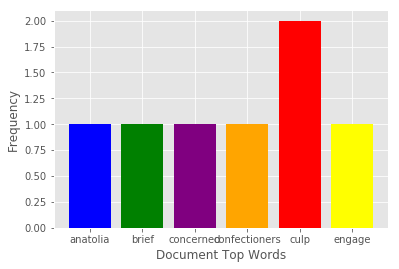

In [54]:
user_category = input("Enter the Document Category to analyse:")
res = analyse_the_document(int(user_category))

In [58]:
# analyse the accuracy of the model
from classify import score,mnb_score,svc_score,rndm_score

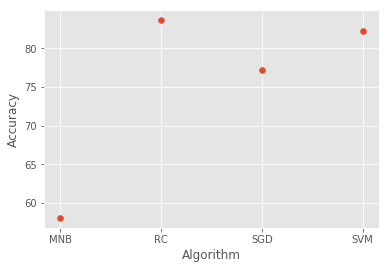

In [123]:
model = [score*100,mnb_score*100,svc_score*100,rndm_score*100]
names = ['SGD','MNB','SVM','RC']
plot = dict(zip(model,names))
X=[]
Y=[]
for acc,alg in plot.items():
    X.append(alg)
    Y.append(acc)
plt.scatter(X,Y)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.show()